<a href="https://colab.research.google.com/github/pranali-kirolkar/MSCPROJECT/blob/main/demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree,svm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
print("Libraries Loaded")

Libraries Loaded


In [145]:
#Sales of Summer clothes Dataset
Dataset = pd.read_csv('/content/SalesSummerClothes.csv')

In [146]:
#Dropanelement
Dataset.drop('Timestamp',axis=1,inplace=True)

In [147]:
#Dropanelement
Dataset.drop('Name',axis=1,inplace=True)

In [148]:
Dataset

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...
197,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4


In [149]:
#showfirstfiveElements
Dataset.head()

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,18-25,Occasionally,"Jeans,Women Dress,Ladies Tops","NIKE,Adidas",500-700,During the sales,Online,YES,No,4
1,18-25,Occasionally,"T-shirt,Jeans","NIKE,Adidas,H&M",700-1000,During the sales,Online,YES,Yes,3
2,18-25,Occasionally,"T-shirt,Jeans,Women Dress,Casual Dress,Ladies ...","NIKE,Adidas,H&M,ZARA",200-500,During the sales,By them in Store,YES,Yes,3
3,18-25,Occasionally,Women Dress,NIKE,500-700,During the sales,By them in Store,YES,Yes,4
4,18-25,Occasionally,Women Dress,Meesho,500-700,Without the sales (Off Season),Online,YES,No,5


In [7]:
#ShowLastFiveElements
Dataset.tail()

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
197,18-25,Occasionally,Casual Dress,H&M,500-700,During the sales,By them in Store,YES,No,4
198,18-25,Regularly,"Women Dress,Casual Dress,Ladies Tops","Adidas,H&M",1000-above,During the sales,By them in Store,YES,No,4
199,18-25,Regularly,"T-shirt,Jeans,Ladies Tops",Adidas,700-1000,During the sales,By them in Store,YES,No,4
200,18-25,Occasionally,"T-shirt,Jeans",Adidas,700-1000,Without the sales (Off Season),By them in Store,NO,No,4
201,35-50,Occasionally,"Women Dress,Casual Dress","H&M,ZARA",700-1000,During the sales,By them in Store,YES,Yes,4


In [150]:
Dataset.columns


Index(['Age', 'Buy_Clothes', 'Type_Clothes', 'Brand_Clothes', 'Price',
       'time_prefer ', 'prefer_purchasing ', 'compare_prices ',
       'worst_experience', 'Rating '],
      dtype='object')

In [151]:
Dataset['Brand_Clothes'] = number.fit_transform(Dataset['Brand_Clothes'].astype('str'))

In [152]:
Dataset['Type_Clothes'] = number.fit_transform(Dataset['Type_Clothes'].astype('str'))

In [154]:
Dataset['Price'] = number.fit_transform(Dataset['Price'].astype('str'))

In [155]:
Dataset

,Age,Buy_Clothes,Type_Clothes,Brand_Clothes,Price,time_prefer,prefer_purchasing,compare_prices,worst_experience,Rating
0,18-25,Occasionally,8,23,2,During the sales,Online,YES,No,4
1,18-25,Occasionally,13,24,3,During the sales,Online,YES,Yes,3
2,18-25,Occasionally,19,26,1,During the sales,By them in Store,YES,Yes,3
3,18-25,Occasionally,25,22,2,During the sales,By them in Store,YES,Yes,4
4,18-25,Occasionally,25,21,2,Without the sales (Off Season),Online,YES,No,5
...,...,...,...,...,...,...,...,...,...,...
197,18-25,Occasionally,0,15,2,During the sales,By them in Store,YES,No,4
198,18-25,Regularly,27,1,0,During the sales,By them in Store,YES,No,4
199,18-25,Regularly,16,0,3,During the sales,By them in Store,YES,No,4
200,18-25,Occasionally,13,0,3,Without the sales (Off Season),By them in Store,NO,No,4


In [156]:
one_hot_data = pd.get_dummies(Dataset[['compare_prices ','worst_experience','time_prefer ']])

In [157]:
one_hot_data

,compare_prices _NO,compare_prices _YES,worst_experience_No,worst_experience_Yes,time_prefer _During the sales,time_prefer _Without the sales (Off Season)
0,0,1,1,0,1,0
1,0,1,0,1,1,0
2,0,1,0,1,1,0
3,0,1,0,1,1,0
4,0,1,1,0,0,1
...,...,...,...,...,...,...
197,0,1,1,0,1,0
198,0,1,1,0,1,0
199,0,1,1,0,1,0
200,1,0,1,0,0,1


In [158]:
one_hot_data = pd.get_dummies(Dataset[['compare_prices ','worst_experience','time_prefer ']],drop_first=True)

In [159]:
one_hot_data

,compare_prices _YES,worst_experience_Yes,time_prefer _Without the sales (Off Season)
0,1,0,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,0,1
...,...,...,...
197,1,0,0
198,1,0,0
199,1,0,0
200,0,0,1


In [160]:
one_hot_data.columns

Index(['compare_prices _YES', 'worst_experience_Yes',
       'time_prefer _Without the sales (Off Season)'],
      dtype='object')

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [162]:
Dataset['Buy_Clothes'].value_counts()

Regularly       118
Occasionally     84
Name: Buy_Clothes, dtype: int64

In [164]:
Dataset['Price'].value_counts()

0    87
3    81
2    29
1     5
Name: Price, dtype: int64

In [163]:
Dataset['Brand_Clothes'].value_counts()

23    33
1     23
15    20
24    11
22    10
0     10
25     9
18     7
28     6
4      5
32     5
30     5
14     5
44     4
3      4
27     4
5      3
9      3
43     3
40     2
13     2
19     2
26     2
35     2
33     2
39     1
10     1
42     1
2      1
36     1
34     1
6      1
7      1
8      1
11     1
21     1
12     1
31     1
29     1
41     1
16     1
17     1
37     1
20     1
38     1
Name: Brand_Clothes, dtype: int64

In [165]:
train, test = train_test_split(one_hot_data, test_size =0.20)

In [166]:
lr = LogisticRegression()
columns = ['time_prefer _Without the sales (Off Season)','worst_experience_Yes','compare_prices _YES']

lr.fit(one_hot_data[columns], one_hot_data['compare_prices _YES'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [167]:
X = train[columns]
y = train['compare_prices _YES']

train_X, val_X, train_y, val_y = train_test_split(
    X, y, test_size=0.20,random_state=0)

In [168]:
lr = LogisticRegression()
lr.fit(train_X, train_y)
predictions = lr.predict(val_X)
accuracy = accuracy_score(val_y, predictions)
print(accuracy)


1.0


In [169]:
from sklearn.metrics import classification_report
print(classification_report(val_y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        32

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [170]:
cm1 = confusion_matrix(val_y, predictions)
cm1

array([[ 1,  0],
       [ 0, 32]])

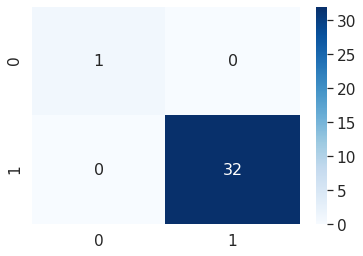

In [171]:
df_cm1 = pd.DataFrame(cm1, range(2), range(2))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm1, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') # font size
plt.show()

In [172]:
train, test = train_test_split(Dataset, test_size =0.25)

In [173]:
train.shape

(151, 10)

In [174]:
test.shape

(51, 10)

In [175]:
c1 = DecisionTreeClassifier(min_samples_split=100)
c2 = DecisionTreeClassifier(min_samples_split=50)

In [214]:
features = ['Rating ']

In [215]:
X_train = train[features]
y_train = train['Type_Clothes']

X_test = test[features]
y_test = test['Price']

In [216]:
tree1 = c1.fit(X_train, y_train)
tree2 = c2.fit(X_train, y_train)

In [217]:
y_pred_t1 = c1.predict(X_train)
y_pred_t2 = c2.predict(X_train)

In [218]:
y_pred1 = c1.predict(X_test)
y_pred2 = c2.predict(X_test)

In [219]:
from sklearn.metrics import accuracy_score

In [220]:
train_score_1 = accuracy_score(y_train, y_pred_t1)*100
train_score_1

38.41059602649007

In [221]:
train_score_2 = accuracy_score(y_train, y_pred_t2)*100
train_score_2

39.0728476821192

In [97]:
test_score_1 = accuracy_score(y_test, y_pred1)*100
test_score_1

0.0

In [98]:
test_score_2 = accuracy_score(y_test, y_pred2)*100
test_score_2

0.0

In [38]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.79      1.00      0.88        19
           5       1.00      1.00      1.00        27

    accuracy                           0.90        51
   macro avg       0.60      0.67      0.63        51
weighted avg       0.82      0.90      0.86        51



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        27

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



RANDOM FOREST ALGO

In [42]:
rf1 = RandomForestClassifier(max_depth=4, n_estimators = 20)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
rf1_model_pred = rf1.predict(X_test)

In [44]:
rf1_model_pred

array([5, 4, 3, 4, 4, 5, 3, 5, 4, 5, 4, 5, 5, 4, 5, 5, 5, 5, 5, 3, 5, 5,
       3, 5, 5, 4, 5, 4, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 4, 4, 3, 4, 5, 4,
       4, 5, 5, 5, 5, 5, 4])

In [45]:
sat_test_score_rf = accuracy_score(y_test, rf1_model_pred)*100
sat_test_score_rf

100.0

              precision    recall  f1-score   support

           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        27

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



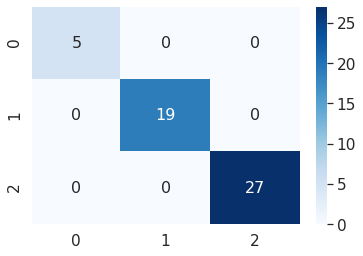

In [47]:
rd = print(classification_report(y_test, rf1_model_pred))
rf_cm = confusion_matrix(y_test, rf1_model_pred)
df_cm3 = pd.DataFrame(rf_cm, range(3), range(3))
sns.set(font_scale=1.4) 
sns.heatmap(df_cm3, annot=True, cmap='Blues', annot_kws={"size": 16}, fmt='g') 
plt.show()

support vector machine

In [50]:
svmf = svm.SVC(C=10000000, kernel='rbf', degree=3)

In [51]:
model_svm = svmf.fit(X_train, y_train)

In [52]:
pred_svm = model_svm.predict(X_test)

In [56]:
sat_test_score_svm = accuracy_score(y_test, pred_svm)*100
sat_test_score_svm

100.0

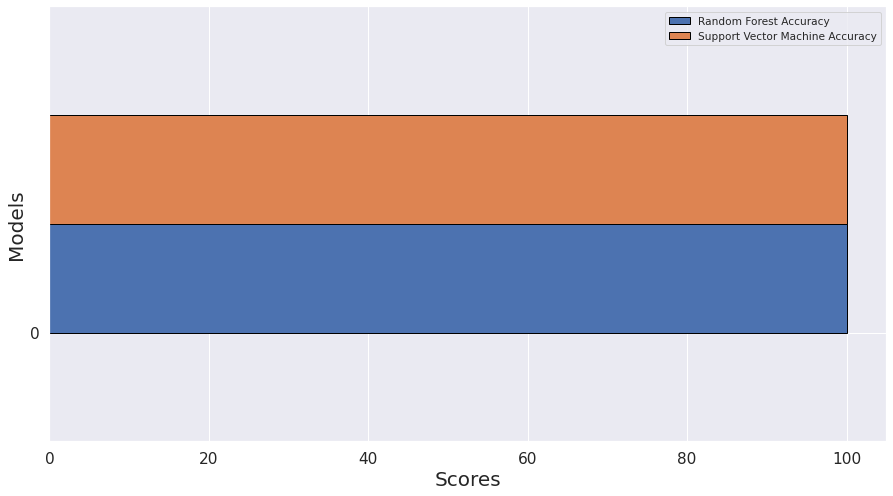

In [58]:
modelacc = pd.DataFrame({
                               "Random Forest Accuracy": [sat_test_score_rf],
                               "Support Vector Machine Accuracy": [sat_test_score_svm]})
modelacc.plot.barh(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Scores', fontsize=20)
plt.ylabel('Models',fontsize=20)
plt.legend(fontsize=10.5);